In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import itertools
import os
import random
import numpy as np
import tensorflow as tf
%matplotlib inline

In [25]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [26]:
train_path='archive/train'
valid_path='archive/val'
test_path='archive/test'

In [27]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10)
val_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(256,256),classes=['cordana','healthy','pestalotiopsis','sigatoka'],batch_size=10,shuffle=False)


Found 777 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [28]:
#data_augmentation=tf.keras.Sequential(tf.keras.layers.experimental.preprocessing.RandomRotation(0.3))

In [83]:
model=Sequential([#data_augmentation,
                  Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=4,activation='softmax')
])

In [84]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [63]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.fit(x=train_batches, validation_data=val_batches,epochs=15)

Epoch 1/15


C:\Users\ajayk\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\ajayk\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:811: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


78/78 [==============================] - 148s 2s/step - loss: 1.0337 - accuracy: 0.5997 - val_loss: 1.2640 - val_accuracy: 0.4875
Epoch 2/15
78/78 [==============================] - 166s 2s/step - loss: 0.8430 - accuracy: 0.6898 - val_loss: 1.0442 - val_accuracy: 0.5750
Epoch 3/15
78/78 [==============================] - 154s 2s/step - loss: 0.6718 - accuracy: 0.7336 - val_loss: 1.0076 - val_accuracy: 0.5750
Epoch 4/15
78/78 [==============================] - 146s 2s/step - loss: 0.4980 - accuracy: 0.8069 - val_loss: 0.7848 - val_accuracy: 0.7125
Epoch 5/15
78/78 [==============================] - 162s 2s/step - loss: 0.3772 - accuracy: 0.8674 - val_loss: 0.5778 - val_accuracy: 0.7875
Epoch 6/15
78/78 [==============================] - 146s 2s/step - loss: 0.2952 - accuracy: 0.8932 - val_loss: 0.5417 - val_accuracy: 0.7750
Epoch 7/15
78/78 [==============================] - 151s 2s/step - loss: 0.2559 - accuracy: 0.9073 - val_loss: 0.6053 - val_accuracy: 0.7625
Epoch 8/15
78/78 [======

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

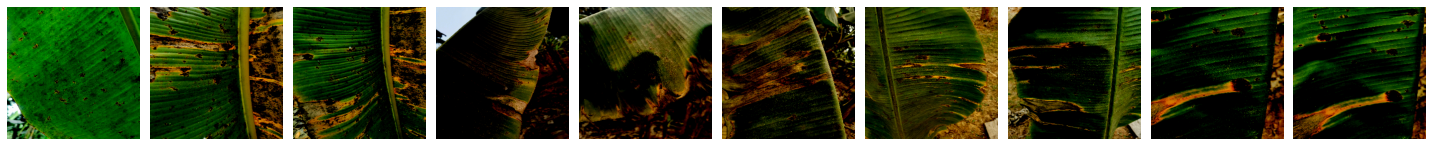

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [73]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [74]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [75]:
predictions=model.predict(x=test_batches, verbose=0)

C:\Users\ajayk\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\ajayk\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:811: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


In [76]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [77]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
test_batches.class_indices

{'cordana': 0, 'healthy': 1, 'pestalotiopsis': 2, 'sigatoka': 3}

Confusion matrix, without normalization
[[ 9  3  4  4]
 [ 0 20  0  0]
 [ 0  1 17  2]
 [ 0  0  0 20]]


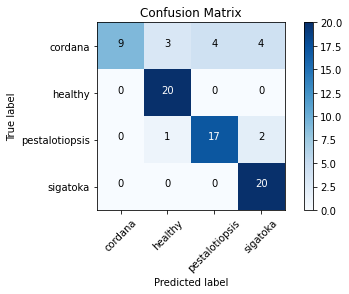

In [80]:
cm_plot_labels = ['cordana','healthy','pestalotiopsis','sigatoka']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')